<a href="https://colab.research.google.com/github/santoshmahanti/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Machine Learning (Classification)
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

This project mainly aims at developing a supervised machine learning model to predict the risk of heart disease in indiviuduals. The data contains 3390 rows and 17 columns.

The project has been conducted in 5 steps:

Data Cleaning
Exploratory Data Analysis (EDA)
Data Transformation
Model Building and Evaluation
Hyperparameter Tuning
Engineered an important feature of pulse pressure using systolic and diastolic blood pressure.

The result is a XGBoost model with almost 97% accuracy, 97% precision and 97% recall.

In conclusion, All the features provided in the dataset are extremely important and contribute towards the risk of getting CHDs. Although, we can conclude some majorly important features like:

As age increases the risk of getting diagnosed with heart disease also increases.

Cigarette consumption is also a major factor that causes CHDs.

Patients having Diabetes and cholesterol problems show a higher risk of CHDs.

Patients having high glucose levels are more prone to CHDs.

Patients with a history of “strokes” have a higher chance of developing CHDs.

Patients with high BMI(Body Mass Index) are at more risk of getting diagnosed with CHDs.

Finally we can say that, XGBoost Classifier has performed best among all the models with the accuracy of 97% & f1-score of 0.9745. It is by far the second highest score we have achieved.So,It's safe to say that XGBoost Classifier provides an optimal solution to our problem.

# **GitHub Link -**

https://github.com/santoshmahanti/Cardiovascular-Risk-Prediction

# **Problem Statement**



***Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.High blood pressure, high blood cholesterol, and smoking are key risk factors for heart disease.There were more than 523.2 million cases of cardiovascular disease in 2019, an increase of 26.6% compared with 2010.***

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.The dataset provides the patient's information. It includes over 4,000 records and 15 attributes.

## **Objective**

*The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD) considering the other features.*

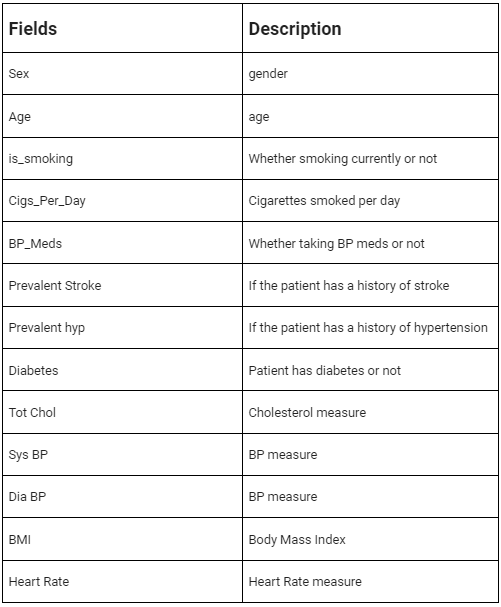

### **Variables**
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

### **Data Description**
**Demographic:**
 
•Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral:**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history):**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

#### **Medical(current):**
• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

####**Predict variable (desired target):**
• 10-year risk of coronary heart disease CHD - DEPENDANT VARIABLE

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Importing data manipulation libraries.
import pandas as pd
import numpy as np

#The warnings module handles warnings in Python. 
#It would be helpful in throwing away warnings caused.
import warnings
warnings.filterwarnings('ignore')

#Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In this section, we will be importing our data from the google drive and perform some usual data analysis on it later on.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
data= pd.read_csv('/content/drive/MyDrive/Cardiovascular Risk Prediction/Data/data_cardiovascular_risk.csv')

### Dataset First View

Here, we will be performing basic and initial analysis on our raw data to check the data inside of each provided column, check the data type of each column and shape of our data.

In [ ]:
# Dataset First Look
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

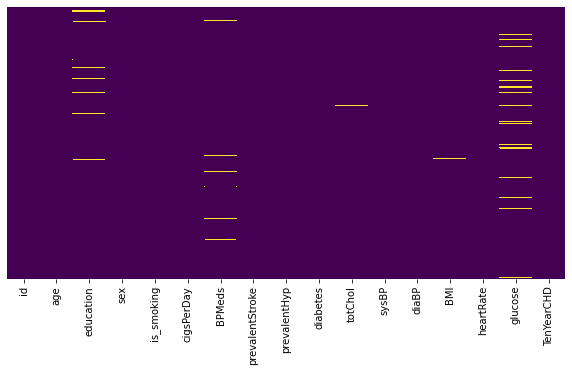

In [ ]:
# Visualizing the missing values
# setting configuration for our plots
plt.rcParams['figure.figsize'] = (10, 5)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:

# checking the percentage of missing values in stores dataframe
features_with_na = [features for features in data.columns if data[features].isnull().sum()>=1]
for feature in features_with_na:
  print(feature,np.around((data[feature].isnull().mean())*100,2), ' % missing values')


education 2.57  % missing values
cigsPerDay 0.65  % missing values
BPMeds 1.3  % missing values
totChol 1.12  % missing values
BMI 0.41  % missing values
heartRate 0.03  % missing values
glucose 8.97  % missing values


### What did you know about your dataset?

*It is seen that there are **3390 rows and 16 columns**.*

*There are some **NULL values** present in **"education","cigsPerDay","BPMeds","totChol","BMI","heartRate"and "glucose"**.*

*There are **9 float type** columns,**4 int type** columns and **2 object type** columns.* 

**"TenYearCHD" is our Target or Dependant variable.**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description 



*   Here we can see our dataset contain both numerical variable as well as categorical variable.
*   TenYearCHD signifies if the person has a risk of heart disease or not. It's a binary attribute(binary: “1”, means “Yes”, “0” means “No”) resembling the diagnosis results for patients. We can use this attribute to see how many patients have a risk of CHD. As our dependent variable is a discrete categorical variable this makes it a classification problem.

*   Almost the same number of entries by smokers and non- smokers.
*   There are few missing values in various column like 'cigsPerDay', 'BPMeds' , 'Education', 'Glucose' etc that needs to be    treated 





### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

Before proceeding further, let's rename our columns for a better understanding and better efficiency.

In [ ]:
# Dropping the 'id' column
data.drop('id', axis = 1, inplace = True)

In [ ]:
#Renaming the columns for a better view and understanding.
data.rename(columns={'sex':'Gender','is_smoking':'smoking','cigsPerDay':'cigarettes/day','BPMeds':'BP_meds',
                   'prevalentStroke':'stroke','prevalentHyp':'hypertensive',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'10yearCHD'},
          inplace = True)

In [ ]:
#Checking the updated names of the columns.
data.columns

Index(['age', 'education', 'Gender', 'smoking', 'cigarettes/day', 'BP_meds',
       'stroke', 'hypertensive', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       '10yearCHD'],
      dtype='object')

### Data Wrangling Code

# **Encoding:**
We are encoding out Categorical feature values into binary values for a better model training and prediction. A Binary Data is a Data which uses two possible states or values i.e. 0 and 1.

The (0 and 1) also referred to as (true and false), (success and failure), (yes and no) etc.

Binary Data is a discrete Data and also used in statistics.

Encoding "Gender"and "Smoking" into binary values.

In [ ]:
#Encoding the 'Gender' feature into binary column.
data['Gender'] = np.where(data['Gender'] == 'M',1,0)

In [ ]:
#Encoding the 'smoking' feature into binary column.
data['smoking'] = np.where(data['smoking'] == 'YES',1,0)

# **Splitting the Data into Categorical and Numerical Variables**

In [ ]:
#Check Unique Values for each variable.
for i in data.columns.tolist():
  print(i,":",data[i].nunique())

age : 39
education : 4
Gender : 2
smoking : 2
cigarettes/day : 32
BP_meds : 2
stroke : 2
hypertensive : 2
diabetes : 2
total_cholesterol : 240
systolic_bp : 226
diastolic_bp : 142
bmi : 1259
heart_rate : 68
glucose : 132
10yearCHD : 2


Since, It's very clear by finding out all the unique values in the dataset that there are multiple continuous and categorical features present. we will be seperating categorical and numerical for better exploration and analysis.

In [ ]:
#Extracting categorical features.

cat_features = ['education','Gender','smoking','BP_meds','stroke','hypertensive','diabetes']
print(f'There are {len(cat_features)} Categorical Features.')

There are 7 Categorical Features.


In [ ]:
#All the Categorical features.
cat_features

['education',
 'Gender',
 'smoking',
 'BP_meds',
 'stroke',
 'hypertensive',
 'diabetes']

In [ ]:
#head of the Categorical columns.
data[cat_features].head()

,education,Gender,smoking,BP_meds,stroke,hypertensive,diabetes
0,2.0,0,1,0.0,0,0,0
1,4.0,1,0,0.0,0,1,0
2,1.0,0,1,0.0,0,0,0
3,1.0,1,1,0.0,0,1,0
4,1.0,0,1,0.0,0,0,0


In [ ]:
#Extracting numerical features.

num_features = ['age','cigarettes/day','total_cholesterol','systolic_bp','diastolic_bp','bmi','heart_rate','glucose']
print(f'There are {len(num_features)} Numerical Features.')

There are 8 Numerical Features.


In [ ]:
#All the numerical features.
num_features

['age',
 'cigarettes/day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [ ]:
#first five rows of numerical columns.
data[num_features].head()

,age,cigarettes/day,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose
0,64,3.0,221.0,148.0,85.0,NaN,90.0,80.0
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0


**After splitting the dataset we have 7 categorical and 8 numerical variables.**

### What all manipulations have you done and insights you found?

*  We are encoding out Categorical feature values into binary values for a bettermodel training and prediction. A Binary Data is a Data which uses two possible states or values i.e. 0 and 1. Encoding "Gender"and "Smoking" into binary values. 
*   It's very clear by finding out all the unique values in the dataset that there are multiple continuous and categorical features present.

*  After splitting the dataset we have 7 categorical and 8 numerical variables.
*  education',
 'Gender',
 'smoking',
 'BP_meds',
 'stroke',
 'hypertensive',
 'diabetes' are categoricl features.

*   'age',
 'cigarettes/day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose' are numerical features.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## **TenYearCHD(Dependant Variable):**

In [ ]:
# Checking the total people who have a risk of CHD(Coronary Heart Disease).
data["10yearCHD"].value_counts()

0    2879
1     511
Name: 10yearCHD, dtype: int64

Here, 10yearCHD signifies if the person has a risk of heart disease or not. It's a binary attribute(binary: “1”, means “Yes”, “0” means “No”) resembling the diagnosis results for patients. We can use this attribute to see how many patients have a risk of CHD. As our dependent variable is a discrete categorical variable this makes it a classification problem.



#### Chart - 1

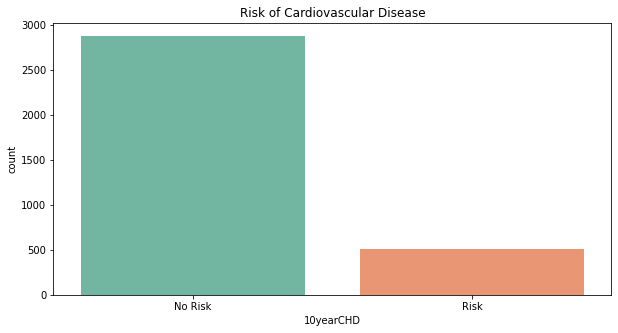

In [ ]:
# Chart - 1 visualization code

# plotting number of patients at risk of CHD vs those whose results are normal.
g = sns.countplot(data['10yearCHD'],palette = "Set2")
g.set_xticklabels(['No Risk','Risk'])
g.set_title('Risk of Cardiovascular Disease')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot help us to understand the frequency of Risk and No Risk of CHD over 10 years.

##### 2. What is/are the insight(s) found from the chart?

Looking at this count plot of target variable shows that the percentage/count of people with normal results are pretty high and this creates the problem of class imbalance. It could create problems for model to perform better because it will be overfitted with entries of normal patients and hence, It will become hard to predict for a person with a CHD because the model would be biased towards "No Risk".

So we have to convert this data into a balance class, we will treat this imbalance using SMOTE, during train/test split.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can find from initial inspection that 15 peope have CHD out of 100 in out dataset. 

# **Analyzing Categorical features:**

### **Gender**

In [ ]:
# Counting the number of males and females.
data["Gender"].value_counts()

0    1923
1    1467
Name: Gender, dtype: int64

#### Chart - 2

Text(0.5, 1.0, 'Count plot of Gender with Target Variable')

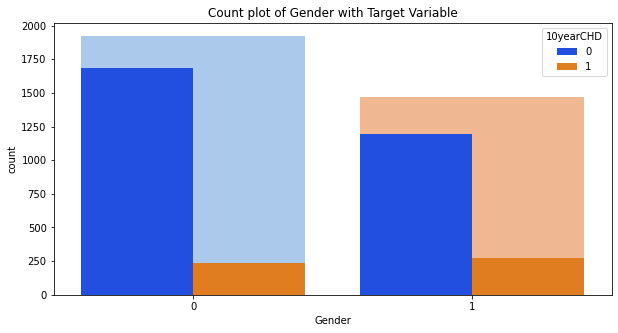

In [ ]:
# Chart - 2 visualization code
# Plotting the bar graph with number of males and females.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data['Gender'], ax=ax, palette='pastel')
sns.countplot(data['Gender'], hue=data['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('Gender')
plt.title('Count plot of Gender with Target Variable')

##### 1. Why did you pick the specific chart?

Countplot help us to understand distribution of gender which posses risk or no risk.

##### 2. What is/are the insight(s) found from the chart?

We can see that number of female(0) entries are more than males(1). Since the data is a bit biased towards females, the model would be much more optimal to predict for a female patient.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Unable to find any positive or negative business insights.

# **Smoking**
Smoking only about one cigarette per day carries a risk of developing coronary heart disease, around half that for people who smoke 20 per day. No safe level of smoking exists for cardiovascular disease.

In [ ]:
# Counting the number of smokers and non-smokers.(Yes = 1,No = 0)
data["smoking"].value_counts()

0    1703
1    1687
Name: smoking, dtype: int64

Almost the same number of entries by smokers and non- smokers. This feature is the ideal type since, it will not create any imbalance in class and it won't create any kind of bias

#### Chart - 3

Text(0.5, 1.0, 'Count plot of Smoking with Target Variable')

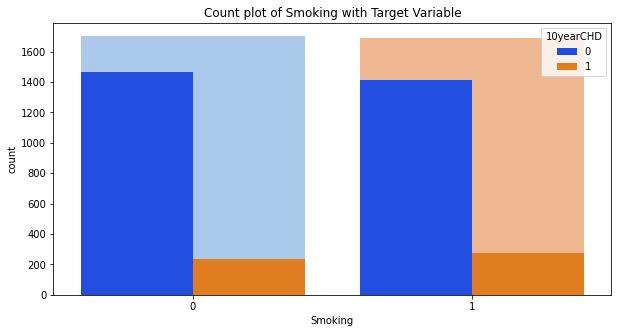

In [ ]:
# Chart - 3 visualization code
# Plotting number of people smoking vs not smoking.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data['smoking'], ax=ax, palette='pastel')
sns.countplot(data['smoking'], hue=data['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('Smoking')
plt.title('Count plot of Smoking with Target Variable')

# **male smokers**

In [ ]:
# Number of males who smokes cigarette.
male_smokers = data.loc[(data['smoking']==1) & (data['Gender']==1)]

In [ ]:
#Checking for the males who are smokers.
ms= male_smokers.shape[0]
print(f'There are total of {ms} male smokers who at least smoke one cigarette a day.')

There are total of 911 male smokers who at least smoke one cigarette a day.


# **female smokers**

In [ ]:
# Number of females who smokes cigarette.
female_smokers = data.loc[(data['smoking']==1) & (data['Gender']==0)]

In [ ]:
#Checking for females who are smokers.
fs = female_smokers.shape[0]
print(f'There are total of {fs} female smokers who at least smoke one cigarette a day.')

There are total of 776 female smokers who at least smoke one cigarette a day.


##### 1. Why did you pick the specific chart?

Thhe above chart use countplot to visualise number of smokers who had a Risk or No Risk of CHD

##### 2. What is/are the insight(s) found from the chart?

From this plot we can conclude that, the non-smokers(0) are at slightly lower risk of getting diagnosed by CHD in 10 years as compares to those who smoke(1).

From individual analysis we can say that although the entries by females are higher than males but the number of smokers are more in males.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Above chart unable to provide any valid positive or negative insights.

# **BP_meds:**
Blood pressure is the pressure of circulating blood against the walls of blood vessels. Most of this pressure results from the heart pumping blood through the circulatory system. When used without qualification, the term "blood pressure" refers to the pressure in the large arteries.

In [ ]:
#Checking the value count of patients who have and have not experienced stroke in the past.
data["BP_meds"].value_counts()

0.0    3246
1.0     100
Name: BP_meds, dtype: int64

#### Chart - 4

Text(0.5, 1.0, 'Count plot of BP_meds with Target Variable')

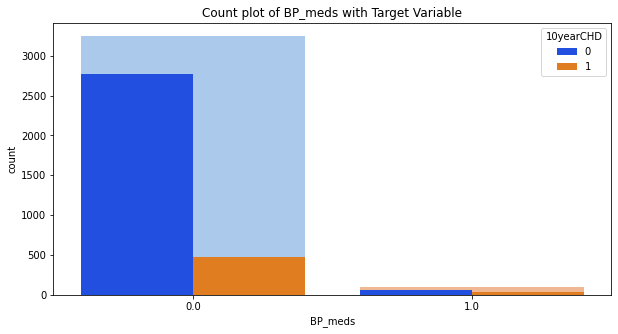

In [ ]:
# Chart - 4 visualization code
#Plotting the count plot for patients who take BP meds vs patients who do not take BP meds with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data['BP_meds'], ax=ax, palette='pastel')
sns.countplot(data['BP_meds'], hue=data['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('BP_meds')
plt.title('Count plot of BP_meds with Target Variable')

##### 1. Why did you pick the specific chart?

I picked the above count plot to visualise if there is any connection between frequency of BPmeds and traget variable 

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see that the count of patients who take BP meds are higher,and out of those maximum patients have less chance of CHD but only few of them are having risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This leads to a positive business insight that Bp medicine should be more advisable.

# **stroke**
A stroke, sometimes called a brain attack, occurs when something blocks blood supply to part of the brain or when a blood vessel in the brain bursts.

In [ ]:
#Checking the value count of patients who have and have not experienced stroke in the past.
data["stroke"].value_counts()

0    3368
1      22
Name: stroke, dtype: int64

#### Chart - 5

Text(0.5, 1.0, 'Count plot of Stroke with Target Variable')

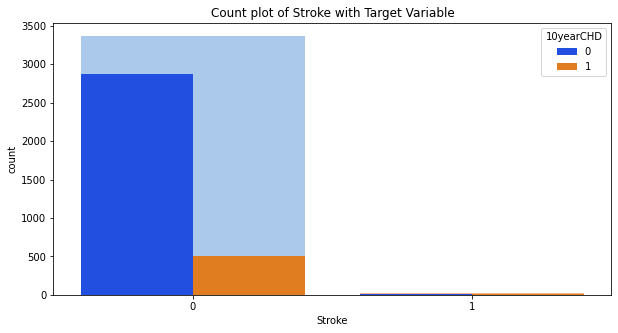

In [ ]:
# Chart - 5 visualization code
#Plotting the count plot for patients who have experienced stroke vs patients who did not with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data['stroke'], ax=ax, palette='pastel')
sns.countplot(data['stroke'], hue=data['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('Stroke')
plt.title('Count plot of Stroke with Target Variable')

##### 1. Why did you pick the specific chart?

The above count plot shows if there is any relation between stroke and target variable of risk of CHD or no risk of CHD.

##### 2. What is/are the insight(s) found from the chart?


From the value count above we can observe that the data have only 22 patients who have experienced stroke in the past, this will create a huge bias for the patients who have not experienced stroke in the past and the model will predict considering that.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Data is too less to provide any business insights.

# **hypertensive**
Hypertension ̶ or elevated blood pressure ̶ is a serious medical condition that significantly increases the risks of heart, brain, kidney and other diseases. An estimated 1.28 billion adults aged 30-79 years worldwide have hypertension, most (two-thirds) living in low- and middle-income countries.

In [ ]:
#Checking for the value count of the hypertensive and non-hypertensive patients.
data["hypertensive"].value_counts()

0    2321
1    1069
Name: hypertensive, dtype: int64

#### Chart - 6

Text(0.5, 1.0, 'Count plot of hypertensive with Target Variable')

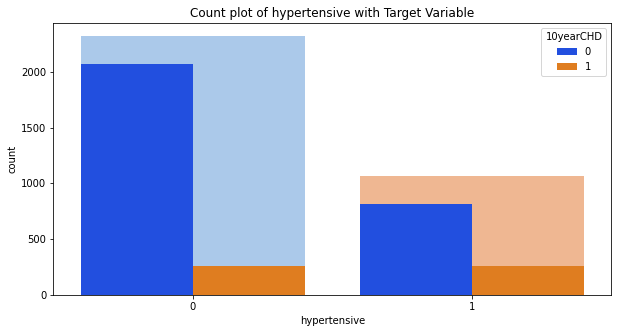

In [ ]:
# Chart - 6 visualization code
#Plotting the count plot for hypertensive  vs non-hypertensive with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data['hypertensive'], ax=ax, palette='pastel')
sns.countplot(data['hypertensive'], hue=data['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('hypertensive')
plt.title('Count plot of hypertensive with Target Variable')

##### 1. Why did you pick the specific chart?

I picked the count chart as it is use to show count of hypertensive and non hypertensive people with risk or no risk of CHD.

##### 2. What is/are the insight(s) found from the chart?

The plot shows the count of patients who are hypertensive is quite high than the non-hypertensive patients but by looking at both of the sides we can observe that the patients who are hypertensive are at high risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It gives negative insight that hypertensive people will always have higher risk of CHD.

# **diabetes**
Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood glucose.

In [ ]:
#Checking the value count of diabetic and non-diabetic patients.
data["diabetes"].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

#### Chart - 7

Text(0.5, 1.0, 'Count plot of diabetes with Target Variable')

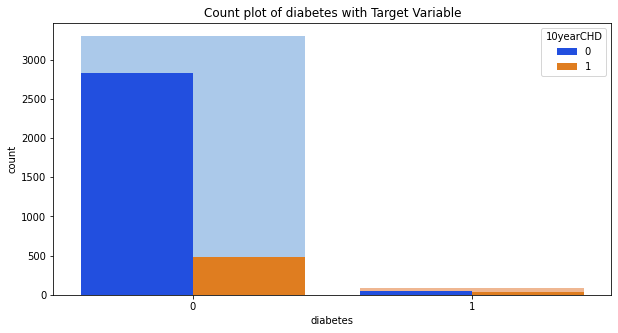

In [ ]:
# Chart - 7 visualization code
#Plotting the count plot for diabetic vs non-diabetic patients with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data['diabetes'], ax=ax, palette='pastel')
sns.countplot(data['diabetes'], hue=data['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('diabetes')
plt.title('Count plot of diabetes with Target Variable')

##### 1. Why did you pick the specific chart?

I picked countplot it help us to undertand the count of diabetic and non-diabetic people and their potential risk of CHD.

##### 2. What is/are the insight(s) found from the chart?

From the above graph we can see that there is a huge difference between the patients who are diabetic and non-diabetic.The dataset is biased towards the patients who are not diabetic and the number of diabetic people are very less.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Data is too less for diabetic person to drive any positive or nrgative insights.

# **Univariate analysis for Numerical Features**

#### Chart - 8

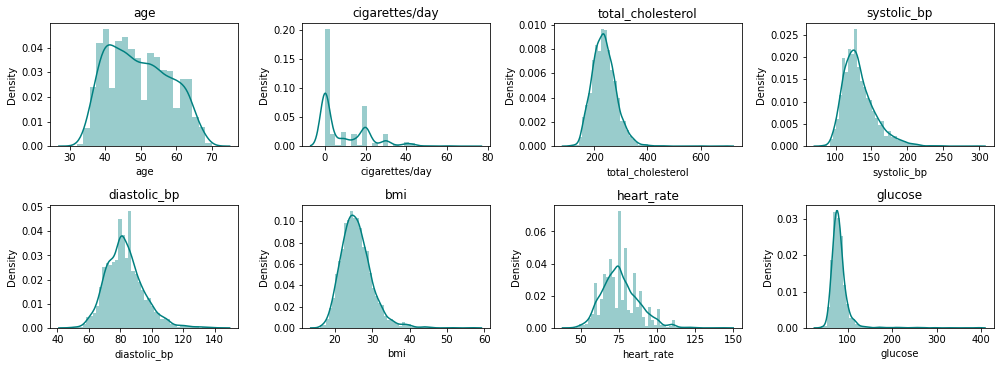

In [ ]:
# Chart - 8 visualization code
# Making distribution plot for Numerical features for checking the skewness.

n=1
plt.figure(figsize=(14,30))
for i in num_features:
  plt.subplot(12,4,n)
  n= n+1
  sns.distplot(data[i],color='teal')
  plt.title(i)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

There are different statistical and visualization techniques of investigation for each type of variable.Here we will be using distplots. As it helps to understand how our data is distributed.

##### 2. What is/are the insight(s) found from the chart?

We observed from the above distribution plot of numerical features that the attributes cigarettes/day, total_cholesterol, systolic_bp, bmi, and glucose are slightly right skewed.

# **Bivariate Analysis**

Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes. This study explores the relationship of two variables as well as the depth of this relationship to figure out if there are any discrepancies between two variables and any causes of this difference.

Here we have shown relationships of **target variable** with all the **numerical variables.**

# **Age**

#### Chart - 9

Text(0.5, 1.0, 'Count plot of Age with Target Variable')

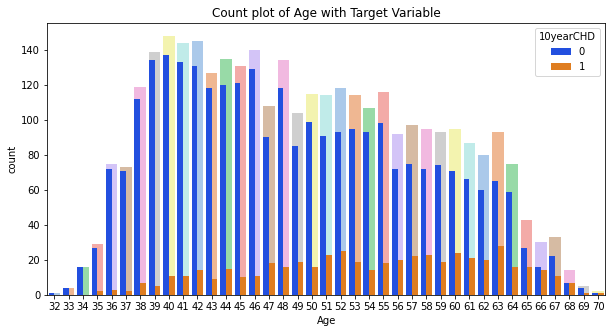

In [ ]:
# Chart - 9 visualization code
#Plotting count plot of age with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data['age'], ax=ax, palette='pastel')
sns.countplot(data['age'], hue=data['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('Age')
plt.title('Count plot of Age with Target Variable')

##### 1. Why did you pick the specific chart?

I picked countplot as it provides frequency distribution of age and shows if a person in particular age has chances of CHD or not.

##### 2. What is/are the insight(s) found from the chart?

In this graph we can see that,between 32 to 40 there is less chance of CHDs.

After 40 there is an increase in CHDs and between 51 to 63 the graph shows highest chance of CHDs and after 63 the chance of CHDs is Decreasing as age increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above chart provide a positive insight that above age of 50 must be treated with mediciine or some sort of exercises so that there is less chance of CHD in that age group.

# **BMI**
The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m².

Being overweight or obese increases your risk of developing diabetes and high blood pressure, both of which are risk factors for CVD.

If your BMI is:

below 18.5 – you're in the underweight range

between 18.5 and 24.9 – you're in the healthy weight range

between 25 and 29.9 – you're in the overweight range

between 30 and 39.9 – you're in the obese range

#### Chart - 10

Text(0.5, 1.0, 'Distributions of BMI Vs Gender with Target class')

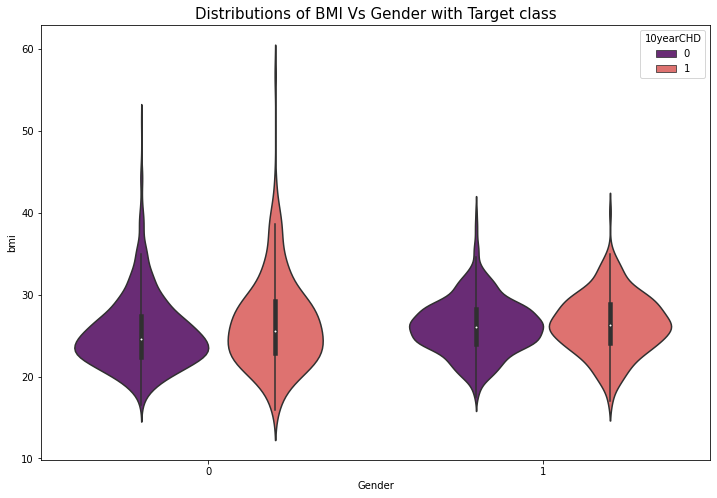

In [ ]:
# Chart - 10 visualization code
#plotting the boxplot between sex variable and BMI variable with target class
plt.figure(figsize=(12,8))
sns.violinplot(data=data,x="Gender", y='bmi',hue="10yearCHD",palette = 'magma')
plt.title("Distributions of BMI Vs Gender with Target class",fontsize=15)

##### 1. Why did you pick the specific chart?

I picked violinplot as it provides better insights on distribution of numeric variable.here it shows the relation between distrubtion of BMI with Gender and provides insight on risk or no risk of CHD.

##### 2. What is/are the insight(s) found from the chart?

In this above plot on x axis 0 represents female and 1 represents male, we can say that Female BMI is more than male BMI that leads to overweight.So,Female CHD is more than male CHD in our dataset

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Above cahrt shows overweight people are more prone to CHD especially female, so we should look out for various business measures that can help to avoid the risk of CHD.

# **cigarettes/day**

#### Chart - 11

Text(0.5, 1.0, 'Count plot of Age with Target Variable')

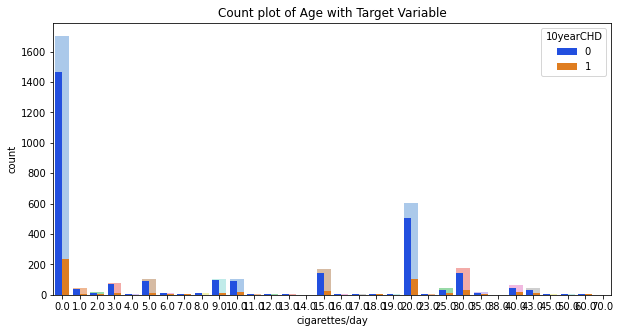

In [ ]:
# Chart - 11 visualization code
#Plotting count plot of 'cigarettes/day' with target variable.
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data['cigarettes/day'], ax=ax, palette='pastel')
sns.countplot(data['cigarettes/day'], hue=data['10yearCHD'],ax=ax, palette='bright')
plt.xlabel('cigarettes/day')
plt.title('Count plot of Age with Target Variable')

##### 1. Why did you pick the specific chart?

I picked Countplot to check the count of people smoking ciggerates per day and chances of having CHD or not with respect to the number of ciggerates per day.

##### 2. What is/are the insight(s) found from the chart?

Cigarettes smoked per day on an average are mainly 0, but 20 cigarettes a day are also prevalent.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Smoking is injurious to health. the above chart proves the same. so people can take measures accordingly.

## **Total_Cholesterol**

*Cholesterol is a fatty substance found in the blood. If you have high cholesterol, it can cause your blood vessels to narrow and increase your risk of developing a blood clot.*

* High cholesterol is when you have too much of a fatty substance called cholesterol in your blood.
* It's mainly caused by eating fatty food, not exercising enough, being overweight, smoking and drinking alcohol. It can also run in families.
* You can lower your cholesterol by eating healthily and getting more exercise. Some people also need to take medicine.
* Too much cholesterol can block your blood vessels. It makes you more likely to have heart problems or a stroke.
* High cholesterol does not cause symptoms. You can only find out if you have it from a blood test.

#### Chart - 12

Text(0.5, 1.0, 'Distributions of Gender Vs Total Cholesterol with Target class')

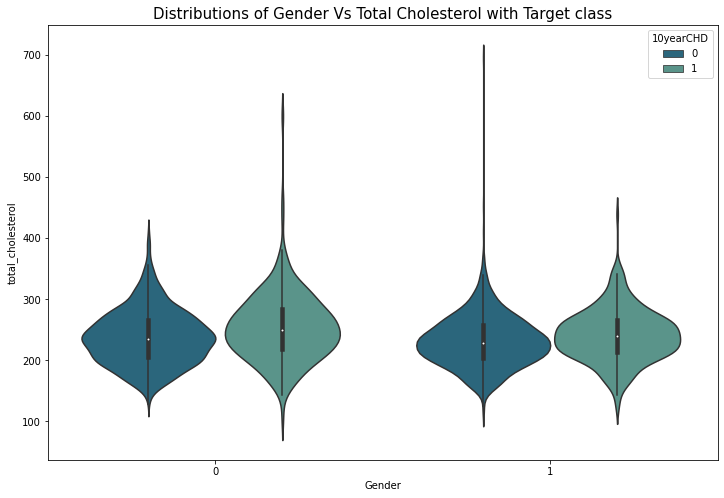

In [ ]:
# Chart - 12 visualization code
#plotting the boxplot between sex variable and totChol variable with target class
plt.figure(figsize=(12,8))
sns.violinplot(data=data,x="Gender", y='total_cholesterol',hue="10yearCHD",palette = 'crest_r')
plt.title("Distributions of Gender Vs Total Cholesterol with Target class",fontsize=15)

##### 1. Why did you pick the specific chart?

I picked violinplot as it provides better insights on distribution of numeric variable. here it shows the relation between distrubtion of Gender with total cholestrol and provides insight on risk or no risk of CHD.

##### 2. What is/are the insight(s) found from the chart?

Female has more cholesterol as compared to male. so, it can cause your blood vessels to narrow and increases your risk of developing a blood clot. In simple terms,more cholesterol leads to increase in CHD problems.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It provides a meaningful insight that more cholestrol leads to increase in CHD problem. So people having more cholestrol should be advisable for medication and other health activities.

## **Heart_Rate**

The number of heartbeats per unit of time, usually per minute. The heart rate is based on the number of contractions of the ventricles (the lower chambers of the heart). The heart rate may be too fast (tachycardia) or too slow (bradycardia). The pulse is a bulge of an artery from waves of blood that course through the blood vessels each time the heart beats. The pulse is often taken at the wrist to estimate the heart rate.

#### Chart - 13

Text(0.5, 1.0, 'Distributions of Gender Vs heart_rate with Target class')

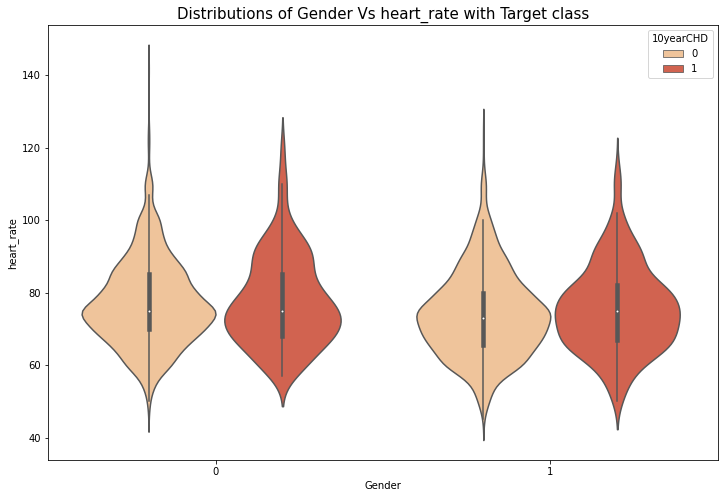

In [ ]:
# Chart - 13 visualization code
#plotting the boxplot between Gender variable and heart_rate variable with target class.
plt.figure(figsize=(12,8))
sns.violinplot(data=data,x="Gender", y='heart_rate',hue="10yearCHD",palette = 'OrRd')
plt.title("Distributions of Gender Vs heart_rate with Target class",fontsize=15)

##### 1. Why did you pick the specific chart?

I picked violinplot here as it shows the relation between distrubtion of Gender with Heart rate and provides insight on risk or no risk of CHD.

##### 2. What is/are the insight(s) found from the chart?

As we can see the violin plot we can say that, Females have high heart rate as compared to males. Heart rate ranges from 40 to 110 and most occurances are around 75.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

unable to derive any business insights.

# **Glucose**
A fasting blood sugar level of 99 mg/dL or lower is normal, 100 to 125 mg/dL indicates you have prediabetes, and 126 mg/dL or higher indicates you have diabetes.

#### Chart - 14

Text(0.5, 1.0, 'Distributions of Gender Vs glucose with Target class')

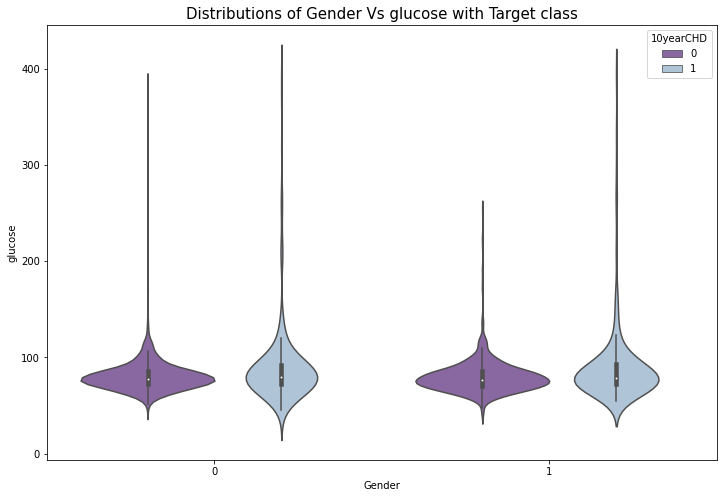

In [ ]:
# Chart - 14 visualization code
#ploting the boxplot between sex variable and glucose variable with target class
plt.figure(figsize=(12,8))
sns.violinplot(data=data,x="Gender", y='glucose',hue="10yearCHD",palette = 'BuPu_r')
plt.title("Distributions of Gender Vs glucose with Target class",fontsize=15)

##### 1. Why did you pick the specific chart?

I picked violinplot here as it shows the relation between distrubtion of Gender with glucose and provides insight on risk or no risk of CHD.

##### 2. What is/are the insight(s) found from the chart?

In the above violin plot,we can see that males with CHD has more glucose level as compared to females with CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It provides a valuable insight that person having high glucose level should be taken care of by medication, diet and exercise.

#### Chart - 15 - Correlation Heatmap

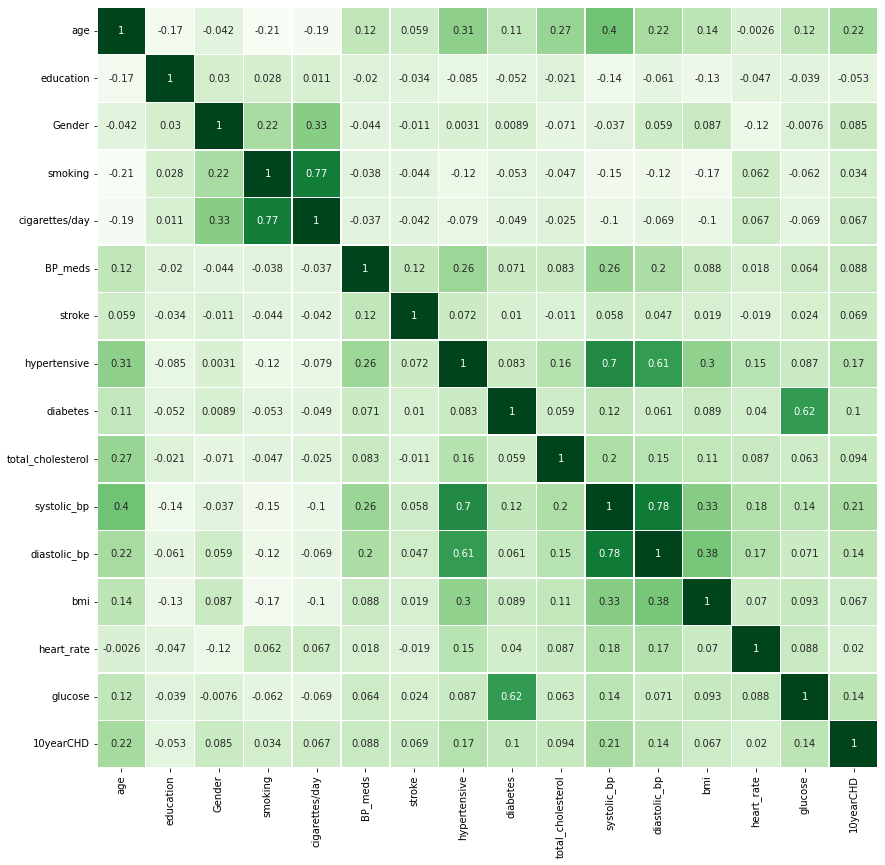

In [ ]:
# Correlation Heatmap visualization code
# Defining a Seaborn correlation map(Heatmap).
correlmap = data.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlmap,cmap= 'Greens', linewidths=.5,annot=True, ax = ax,cbar=False)

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

##### 2. What is/are the insight(s) found from the chart?

### From the heatmap we can understand that :

*   Highest correlation exists between systolic BP and diastolic BP.
*   Systolic and Diastolic BP influece hypertension and BMI.
*   Systolic BP and age have a positive correleation.
*   Variables such as age, prevalent hypertension, systolic BP, diastolic BP, and glucose influence the risk of heart disease mainly.
*   All the variables have a positive correlation with the dependent variable, except for education, by a very small value.


#### Chart - 16 - Pair Plot 

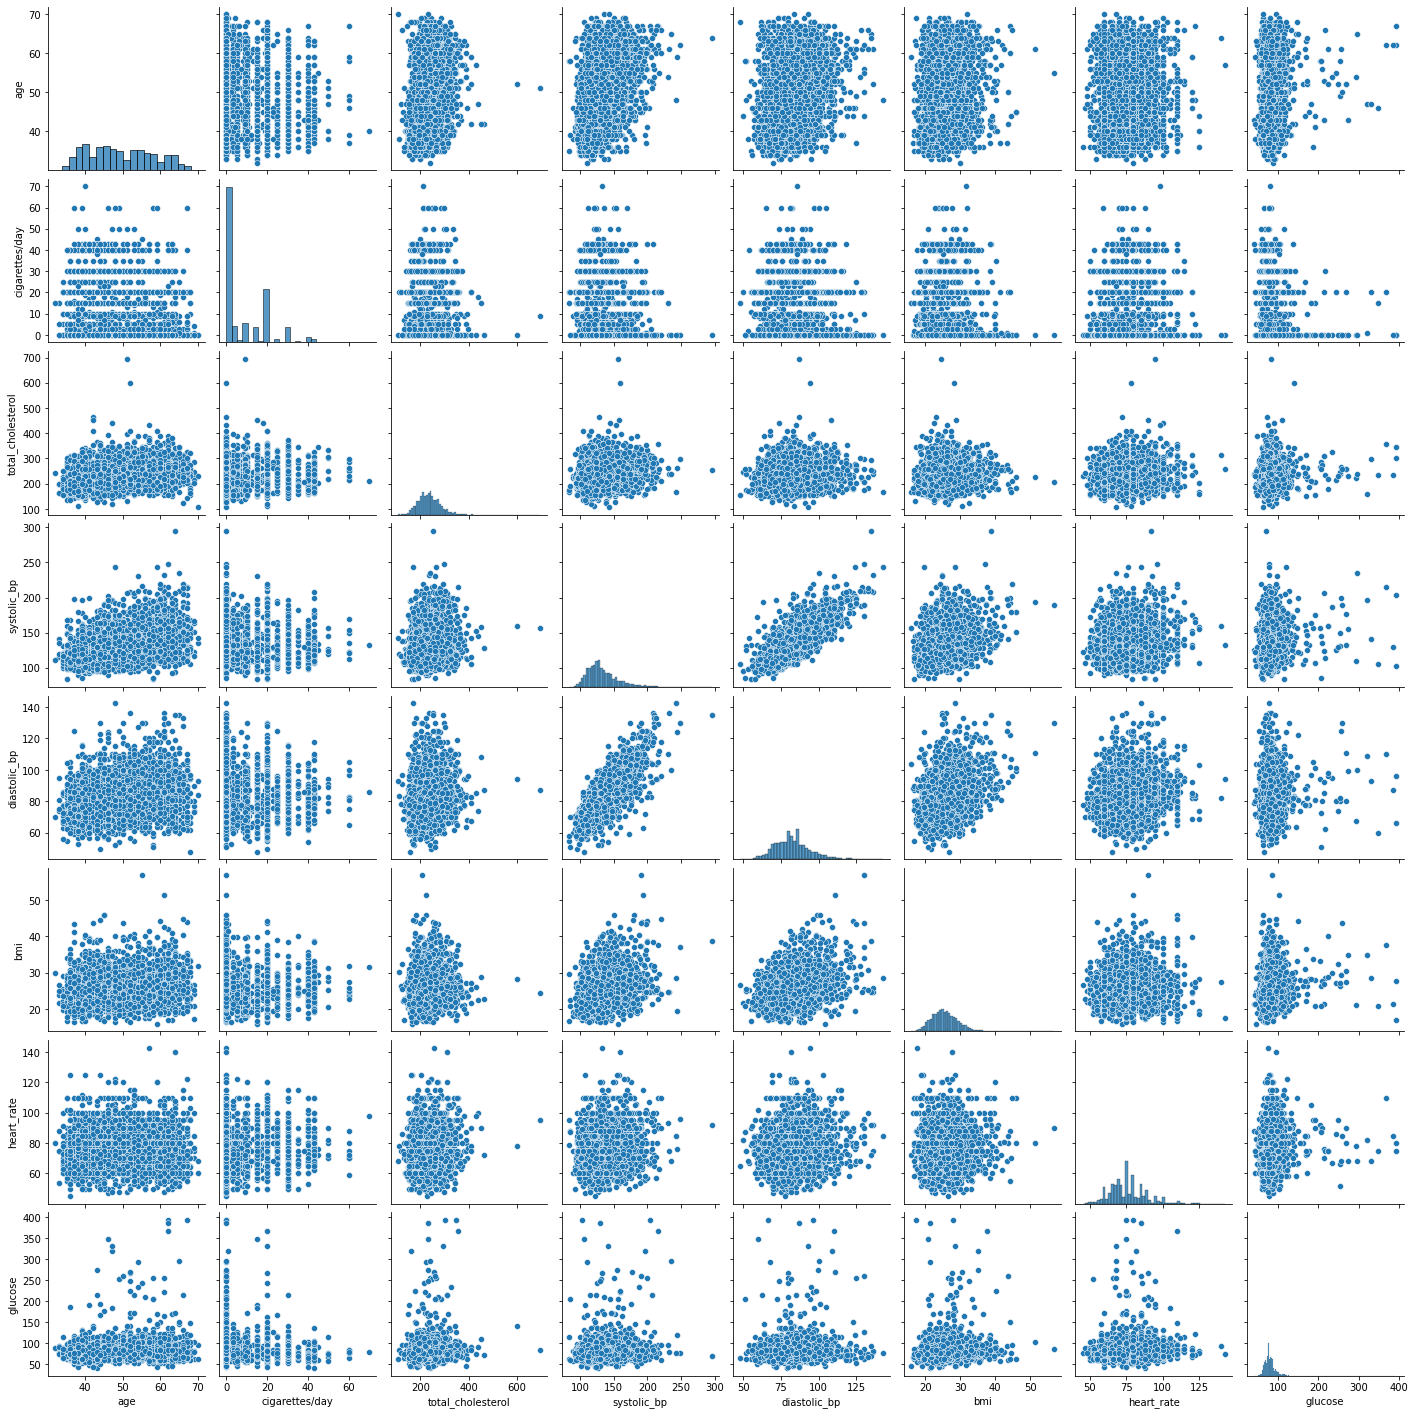

In [ ]:
sns.pairplot(data[num_features])

##### 1. Why did you pick the specific chart?

I picked pairplot as it shows relationship betwwen multiple featues using scatterplot.

##### 2. What is/are the insight(s) found from the chart?

### The above Pairplot explains bivariate analysis for all the numerical columns, we can understand that:

*   As cholestrol is low the systolic BP also remains low.
*   Systolic BP and diastolic BP have a positive relationship.
*   Most of the cases, less cholesterol means less glucose.
*   Diastolic BP, systolic BP and BMI have a slight positive relationship.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypertensive doesnt lead to risk of CHD is my null hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
import scipy.stats as stats

In [ ]:
dataset_table=pd.crosstab(data['hypertensive'],data['10yearCHD'])
print(dataset_table)

10yearCHD        0    1
hypertensive           
0             1821  229
1              712  219


In [ ]:
dataset_table.values 

array([[1821,  229],
       [ 712,  219]])

In [ ]:

#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[1821  229]
 [ 712  219]]


In [ ]:
val=stats.chi2_contingency(dataset_table)

In [ ]:
val

(75.53415271812618,
 3.591408434970844e-18,
 1,
 array([[1741.91546461,  308.08453539],
        [ 791.08453539,  139.91546461]]))

In [ ]:
Expected_Values=val[3]

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05
     

Degree of Freedom:- 1


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 76.49839394188645


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [ ]:

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


##### Which statistical test have you done to obtain P-Value?

I have done Chi-Square Test

##### Why did you choose the specific statistical test?

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Diabetis lead to risk of CHD is my null hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
dataset_table=pd.crosstab(data['diabetes'],data['10yearCHD'])
print(dataset_table)

10yearCHD     0    1
diabetes            
0          2483  424
1            50   24


In [ ]:
dataset_table.values

array([[2483,  424],
       [  50,   24]])

In [ ]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[2483  424]
 [  50   24]]


In [ ]:
val=stats.chi2_contingency(dataset_table)

In [ ]:
val

(16.628767488469254,
 4.5456306618318185e-05,
 1,
 array([[2470.1211003,  436.8788997],
        [  62.8788997,   11.1211003]]))

In [ ]:
Expected_Values=val[3]

In [ ]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [ ]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [ ]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 17.999212097455228


In [ ]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)   

critical_value: 3.841458820694124


In [ ]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 2.209964205268644e-05
Significance level:  0.05
Degree of Freedom:  1
p-value: 2.209964205268644e-05


In [ ]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


##### Which statistical test have you done to obtain P-Value?

I have done Chi-Square Test

##### Why did you choose the specific statistical test?

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

### **Before**

In [ ]:
#Checking the null count before removal of the null values.
data[['cigarettes/day','BP_meds','total_cholesterol','bmi','heart_rate','glucose']].isna().sum()

cigarettes/day        22
BP_meds               44
total_cholesterol     38
bmi                   14
heart_rate             1
glucose              304
dtype: int64

In [ ]:
# Handling Missing Values & Missing Value Imputation
#Dropping the null values from the data.
data.dropna(subset=['cigarettes/day','BP_meds','total_cholesterol','bmi','heart_rate','glucose'],inplace= True)

## **After**

In [ ]:
#Checking the null count after removal of the null values.
data[['cigarettes/day','BP_meds','total_cholesterol','bmi','heart_rate','glucose']].isna().sum()

cigarettes/day       0
BP_meds              0
total_cholesterol    0
bmi                  0
heart_rate           0
glucose              0
dtype: int64

In [ ]:
#Dropping Education from the dataset.
data.drop(['education'], axis=1, inplace=True)

In [ ]:
#Checking the count of null values in each column after treatment.
data.isna().sum()

age                  0
Gender               0
smoking              0
cigarettes/day       0
BP_meds              0
stroke               0
hypertensive         0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
10yearCHD            0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?


Dropping all the missing values from the columns, It will not be a good idea to treat these columns with other popular techniques because of the nature and sensitivity of this dataset. It will not be quite justified the treatment. The best treatment is just dropping them.

We have dropped education here beacause dropping only the missing values removes whole row and it will lead to shrink the data as we already have small dataset.So,We will be dropping the education column since it is not directly related with our target feature

### 2. Handling Outliers

## **Outlier Detection**

*Outlier Analysis is a process that involves identifying the anomalous observation in the dataset. Outliers are extreme values that deviates from the other observations in the dataset.*

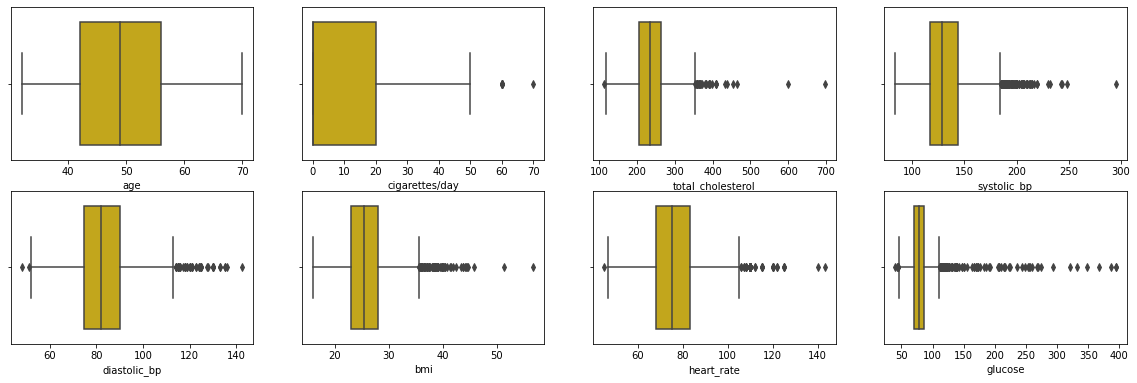

In [ ]:
# Handling Outliers & Outlier treatments
# plotting boxplot for each numerical feature to check for the outliers.

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1
for numerical_feature in num_features:
    ax = plt.subplot(12,4,plotnumber)
    sns.boxplot(data[numerical_feature], color='#DEB800')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

*We can see a lot of outliers in columns like, **total_cholesterol, systolic_bp, diastolic_bp, bmi, glucose,** etc. As stated before we can't manipulate data in such way that we change the original patient stats, neither we can entirely drop those entries with outliers. This will lead to huge amount of data loss, We would lose meaningful data in order to achieve accurate predictions. The best solution to this could only be, to drop the rows with such outliers with minimal data loss.*

##**Removing the borderline outliers**

Removing the borderline outliers, We'll try to be considerate and only drop values that do not make any sense or unlikely to occur.

In [ ]:
# Removing values of Cigarette per day greater than 50.
data = data[data["cigarettes/day"] <= 50]
# Removing values of DiaBp greater than 140.
data = data[data['diastolic_bp'] <= 140]
# Removing values of SysBP greater than 250.
data = data[data['systolic_bp'] <= 250]
# Removing values of BMI greater than 50.
data = data[data['bmi'] <= 50]
# Removing values of heart rate greater than 130.
data = data[data["heart_rate"] <= 130]
# Removing values of glucose greater than 300.
data = data[data["glucose"] <= 300]
# Removing values of total cholesterol greater than 500.
data = data[data["total_cholesterol"] <= 500]

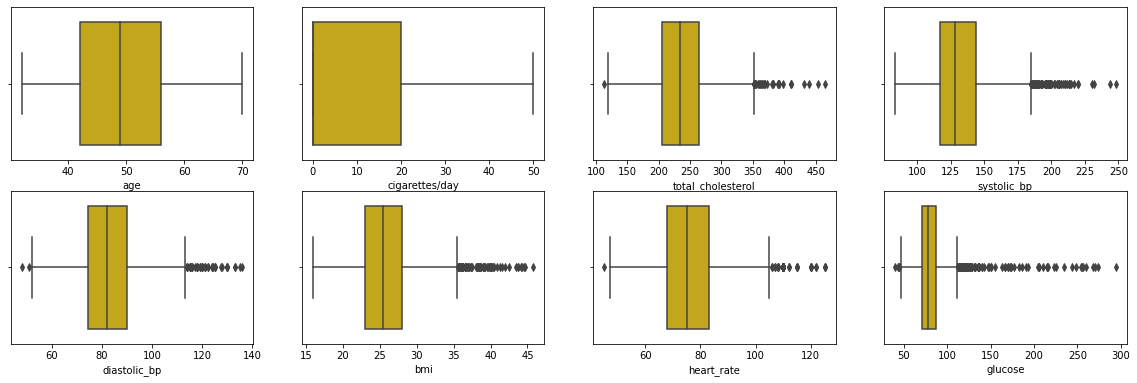

In [ ]:
# plotting boxplot for each numerical feature to check for the outliers.

plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1
for numerical_feature in num_features:
    ax = plt.subplot(12,4,plotnumber)
    sns.boxplot(data[numerical_feature], color='#DEB800')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

In [ ]:
#Information after removing the borderline outliers.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2981 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2981 non-null   int64  
 1   Gender             2981 non-null   int64  
 2   smoking            2981 non-null   int64  
 3   cigarettes/day     2981 non-null   float64
 4   BP_meds            2981 non-null   float64
 5   stroke             2981 non-null   int64  
 6   hypertensive       2981 non-null   int64  
 7   diabetes           2981 non-null   int64  
 8   total_cholesterol  2981 non-null   float64
 9   systolic_bp        2981 non-null   float64
 10  diastolic_bp       2981 non-null   float64
 11  bmi                2981 non-null   float64
 12  heart_rate         2981 non-null   float64
 13  glucose            2981 non-null   float64
 14  10yearCHD          2981 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 372.6 KB


##### What all outlier treatment techniques have you used and why did you use those techniques?

We can see a lot of outliers in columns like, total_cholesterol, systolic_bp, diastolic_bp, bmi, glucose, etc. As stated before we can't manipulate data in such way that we change the original patient stats, neither we can entirely drop those entries with outliers. This will lead to huge amount of data loss, We would lose meaningful data in order to achieve accurate predictions. The best solution to this could only be, to drop the rows with such outliers with minimal data loss.

### 3. Categorical Encoding

# **One-Hot Encoding:**

*One hot encoding can be defined as the essential process of converting the categorical data variables to be provided to machine and deep learning algorithms which in turn improve predictions as well as classification accuracy of a model.*

In [ ]:
# Encode your categorical columns
#Creating dummy variables from categorical features.
dataset = pd.get_dummies(data,columns = ['Gender','BP_meds','stroke','hypertensive','diabetes'])

In [ ]:
#Checking head after creating dummies.
dataset.head()

,age,smoking,cigarettes/day,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,10yearCHD,Gender_0,Gender_1,BP_meds_0.0,BP_meds_1.0,stroke_0,stroke_1,hypertensive_0,hypertensive_1,diabetes_0,diabetes_1
1,36,0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1,1,0,1,0,0,1,1,0
2,46,1,10.0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,1,0,1,0,1,0,1,0
3,50,1,20.0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1,1,0,1,0,0,1,1,0
4,64,1,30.0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0,1,0,1,0,1,0,1,0
5,61,0,0.0,272.0,182.0,121.0,32.80,85.0,65.0,1,1,0,1,0,1,0,0,1,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

We have use One-Hot Encodind because encoding out Categorical feature values into binary values for a better model training and prediction. A Binary Data is a Data which uses two possible states or values i.e. 0 and 1.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

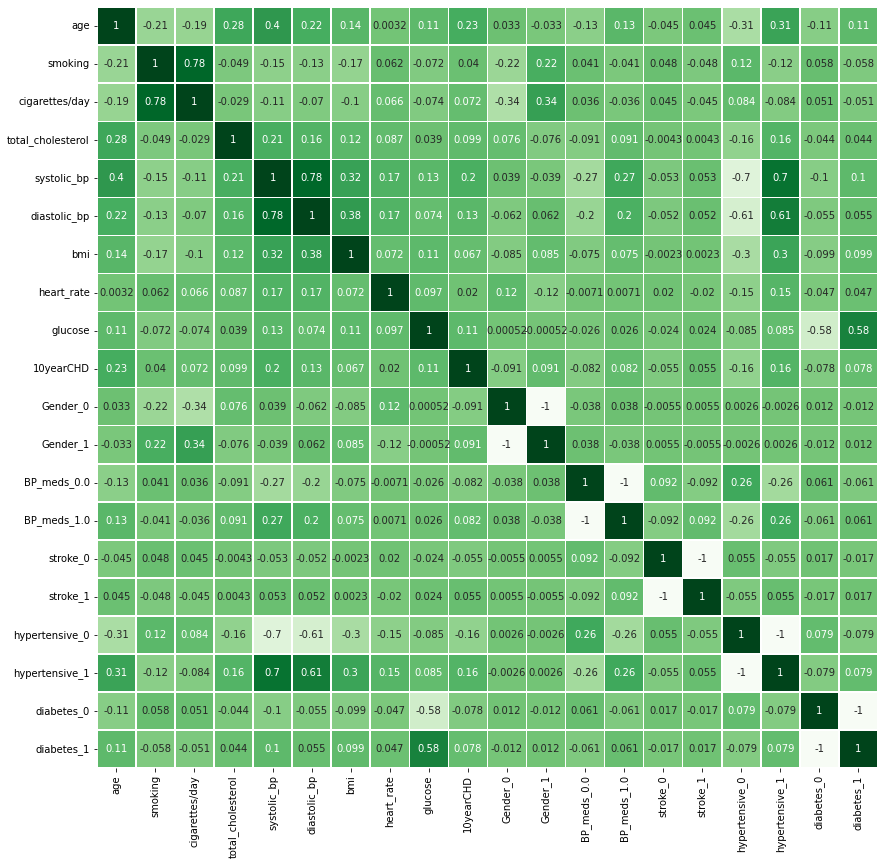

In [ ]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = dataset.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlmap,cmap= 'Greens', linewidths=.5,annot=True, ax = ax,cbar=False)

## **Diastolic_bp and Systolic_bp**
*From the above Heatmap, We can see both of these columns are heavily correleted, there's some relationship we can establish with these two features further.*

*Also Elevation of systolic blood pressure predicts the risk of cardiovascular disease better than increases in diastolic blood pressure. Although associated with more variability in measurement, systolic blood pressure is easier to determine and allows more appropriate risk stratification than diastolic blood pressure.*

*We can combine these two features using the following formula:*

### **MAP = (Systolic Blood Pressure + 2 x Diastolic Blood Pressure) / 3**
*Here, MAP signifies Mean Arterial Pressure*

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Calculating MAP using 'SysBP' and 'DiaBP'.
dataset["mean_art_pressure"] = (dataset["systolic_bp"] + 2 * dataset["diastolic_bp"])/3

In [ ]:
# Dropping the SysBP and DiaBp attributes, since they're both included in MAP.
dataset.drop(columns = ["systolic_bp", "diastolic_bp"], inplace = True)

***Dropping Smoking***

*Since, the cigarette/day column is already having the information about smokers and non-smokers, where we can define by the number of cigarettes consumed by patients.So, we will be dropping the smoking column.*

*(As in cigarette/day column 0 represents patients who are non-smokers)*

In [ ]:
#Dropping the smoking.
dataset.drop(columns = ["smoking"], inplace = True)

### **Checking Multi-collinearity after adjustments**

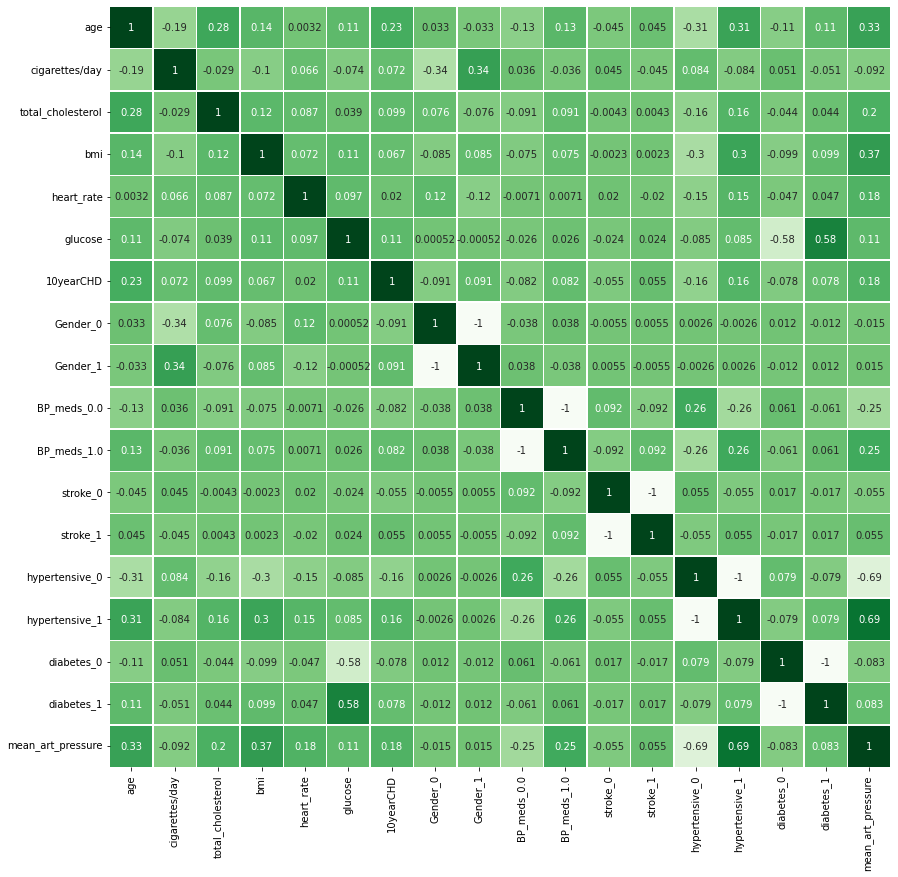

In [ ]:
# Defining a Seaborn correlation map(Heatmap).
correlmap = dataset.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlmap,cmap= 'Greens', linewidths=.5,annot=True, ax = ax,cbar=False)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Checking the dataset after all the adjustments and transformations.
dataset

,age,cigarettes/day,total_cholesterol,bmi,heart_rate,glucose,10yearCHD,Gender_0,Gender_1,BP_meds_0.0,BP_meds_1.0,stroke_0,stroke_1,hypertensive_0,hypertensive_1,diabetes_0,diabetes_1,mean_art_pressure
1,36,0.0,212.0,29.77,72.0,75.0,0,0,1,1,0,1,0,0,1,1,0,121.333333
2,46,10.0,250.0,20.35,88.0,94.0,0,1,0,1,0,1,0,1,0,1,0,86.000000
3,50,20.0,233.0,28.26,68.0,94.0,1,0,1,1,0,1,0,0,1,1,0,111.333333
4,64,30.0,241.0,26.42,70.0,77.0,0,1,0,1,0,1,0,1,0,1,0,102.166667
5,61,0.0,272.0,32.80,85.0,65.0,1,1,0,1,0,1,0,0,1,1,0,141.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,0.0,217.0,26.98,105.0,113.0,0,1,0,1,0,1,0,0,1,1,0,118.000000
3385,60,0.0,261.0,29.28,70.0,103.0,0,1,0,1,0,1,0,1,0,1,0,93.833333
3386,46,0.0,199.0,21.96,80.0,84.0,0,1,0,1,0,1,0,1,0,1,0,71.333333
3387,44,3.0,352.0,28.92,73.0,72.0,1,0,1,1,0,1,0,0,1,1,0,134.000000


In [ ]:
#Checking the shape of the dataset after all the transformations.

dataset.shape

(2981, 18)

##### What all feature selection methods have you used  and why?

 *   Using heatmap, I found Highest correlation exists between systolic BP and diastolic BP. so have made a new feature using above two feature. 
MAP = (Systolic Blood Pressure + 2 x Diastolic Blood Pressure) / 3

*   Also found we have two column one Smoking and other Ciggerate/day boths are same so we drop smoking column.




##### Which all features you found important and why?

From analysis I found our independent features: 'age', 'cigarettes/day', 'total_cholesterol', 'bmi', 'heart_rate',
'glucose', 'Gender', 'BP_meds', 'stroke', 'hypertensive', 'diabetes', 'mean_art_pressure'are important 

Our target feature is  '10yearCHD'

### 6. Data Scaling

In [ ]:
# Scaling your data
#Applying normalization operation for numeric stability
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
# X = standardizer.fit_transform(X_resampled)
columns_to_scale =  ['age','cigarettes/day','total_cholesterol','mean_art_pressure','bmi','heart_rate','glucose']
dataset[columns_to_scale] = standardizer.fit_transform(dataset[columns_to_scale])

##### Which method have you used to scale you data and why?

***Scaling the Numerical Variables with StandardScaler.***


*StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1. So that all the numeical variable values are between minimum and maximum range*

### 8. Data Splitting

## **Splitting The Data**

***Train Test Split:*** *The train-test split is a technique for evaluating the performance of a machine learning algorithm.
It can be used for classification or regression problems and can be used for any supervised learning algorithm.The procedure involves taking a dataset and dividing it into two subsets.*

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting the data into set of independent variables and a dependent variable.
X = dataset.drop('10yearCHD',axis=1).values
y = dataset['10yearCHD'].values

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
# Dividing the data in training and test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0,stratify=y)
# checking the shape of our train and test data.
print(X_train.shape)
print(X_test.shape)

(2235, 17)
(746, 17)


##### What data splitting ratio have you used and why? 

The 0.25 splitting ratio used normally is a common choice for the size of the test set, as it provides a good balance between the size of the training set and the size of the test set. A larger test set can provide a more accurate estimate of the model's performance on unseen data, but it also means that there is less data available for training the model, which can affect the model's ability to learn the relationships in the data.

### 9. Handling Imbalanced Dataset

##**Graph of Imbalance**

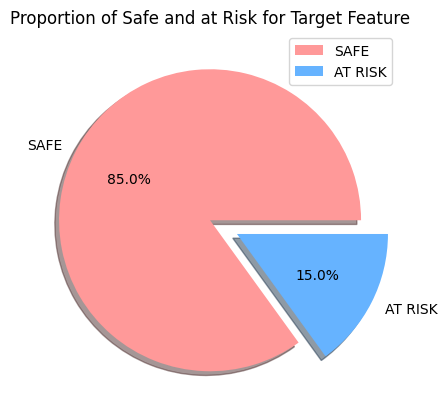

In [ ]:
# Plotting the pie chart to check the balance in the dataset.

plt.figure(figsize=(7,5), dpi=100)
proportion = data['10yearCHD'].value_counts()
labels = ['SAFE','AT RISK']
plt.title('Proportion of Safe and at Risk for Target Feature')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#ff9999','#66b3ff'])
plt.legend()
plt.show()

In [ ]:
# Checking the count of the classes in the target variable.

data['10yearCHD'].groupby(data['10yearCHD']).count()

10yearCHD
0    2533
1     448
Name: 10yearCHD, dtype: int64

##### Do you think the dataset is imbalanced? Explain Why.

As we can see that our target variable is highly imbalanced.

Majority of the data points belong to "SAFE"(no risk of CHD) class. Ratio of "SAFE" class to "AT RISK" class is 17:3.

In [ ]:
# Handling Imbalanced Dataset (If needed)
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE
# Creating the instance
smote = SMOTE(random_state = 42)

In [ ]:
# fit predictor and target variable
X_train_sm, y_train_sm = smote.fit_resample(X, y)

In [ ]:
# checking the length of our train set before and after handeling imbalance.

print('Original dataset shape', len(X_train))
print('Resampled dataset shape', len(X_train_sm))

Original dataset shape 2235
Resampled dataset shape 5066


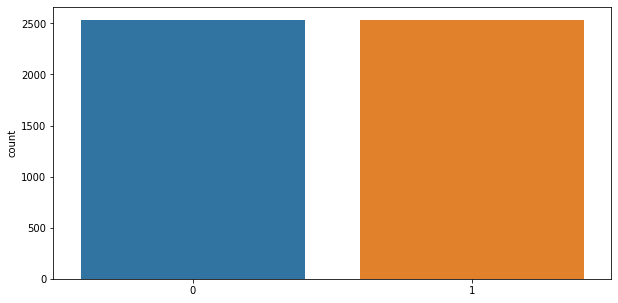

In [ ]:
# Plotting the count plot to check the balance after handling imbalance.
sns.countplot(y_train_sm)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Handling imbalance of target variable using SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
# Dataframe to contain Model performance analysis reports.
res_df=pd.DataFrame()

# **Performance Metrics**

*Different performance metrics are used to evaluate machine learning model. Based on our task we can choose our performance metrics. Since our task is of classification and that too binary class classification, whether client will or will not subscribe for deposits.*

*Here we will be using AUC ROC*

***ROC** also known as Receiver Operating Characteristics, shows the performance of binary class classifiers across the range of all possible thresholds plotting between true positive rate and 1-false positive rate.*

***AUC** measures the likelihood of two given random points, one from positive and one from negative, the classifier will rank the positive points above negative points. AUC-ROC is popular classification metric that presents the advantage of being independent of false positive or negative points.*

***Secondary Performance Metrics***

***Macro-F1 Score:** F1 score is the harmonic mean between Precision and Recall. Macro F1 score is used to know how our model works in overall dataset.*

***Confusion Matrix:** This matrix gives the count of true negative, true positive, false positive and false negative data points.*

In [ ]:
#Importing Important libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

## **Models**
*Following models have been used for predictions:-*

* Logistic Regression Classifier
* Decision Tree Classifier
* Random Forest Classifier
* K-Nearest Neighbors Classifier
* Gaussian Naive Bayes Classifier
* Extreme Gradient Boost Classifier
* Support Vector Machine Classifier

## ***7. ML Model Implementation***

### ML Model - 1 (**Logistic Regression Classifier**)

In [ ]:
# ML Model - 1 Implementation
#Importing Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
clf.fit(X_train_sm,y_train_sm)

# Predict on the model
train_class_preds = clf.predict(X_train_sm)
test_class_preds = clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

# **Logistic Regression Classifier**

*Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Logistic Regression is used when the dependent variable(target) is categorical. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.*

*Logical regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not.*

*For example, 0 – represents a negative class; 1 – represents a positive class. Logistic regression is commonly used in binary classification problems where the outcome variable reveals either of the two categories (0 and 1).*

*Typical properties of the logistic regression equation include:*

* *Logistic regression’s dependent variable obeys ‘Bernoulli distribution*’

* *Estimation/prediction is based on ‘maximum likelihood.’*

* *Logistic regression does not evaluate the coefficient of determination (or R squared) as observed in linear regression’. Instead, the model’s fitness is assessed through a concordance.*

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy = accuracy_score(train_class_preds, y_train_sm)
test_accuracy = accuracy_score(test_class_preds, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.673509672325306
The accuracy on test data is  0.6621983914209115


[[414 220]
 [ 32  80]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

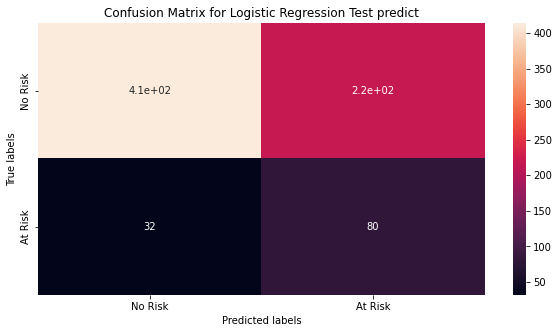

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
     

In [ ]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.93      0.65      0.77       634
           1       0.27      0.71      0.39       112

    accuracy                           0.66       746
   macro avg       0.60      0.68      0.58       746
weighted avg       0.83      0.66      0.71       746



In [ ]:
# Getting classification report.

dict_1 = classification_report(y_test, y_pred_log_reg, output_dict = True)

In [ ]:
#Adding results to model evaluation dataframe.
tempodf=pd.DataFrame(dict_1).transpose()
tempodf['Model'] = 'Logistic Regression Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier


##### Which hyperparameter optimization technique have you used and why?

As the logistic regression classifier completely underfits, Logistic regression does not really have any critical hyperparameters to tune.

### ML Model - 2  **(Decision Tree Classifier)**

In [ ]:
# ML Model - 2 (Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Importing libraries for DecisionTreeClassifier model.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating model object for DecisionTreeClassifier.
dt_clf = DecisionTreeClassifier()

In [ ]:
# Storing the hyperparameters in Dict
parameters = {'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]}

In [ ]:
# Applying GridSearchCV for hyperparameter tuning.
dt_clf = GridSearchCV(dt_clf, parameters, scoring='roc_auc', cv=5)

In [ ]:
# Fitting the model
dt_clf.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc')

In [ ]:
# Checking the best parameters
dt_clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=20)

In [ ]:
# Getting the predicted classes for training and testing set

train_dt_prediction = dt_clf.predict(X_train_sm)
test_dt_prediction = dt_clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

# **Decision Tree Classifier**
*Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.*

*Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.*

*In a Decision Tree diagram, we have:*

**Root Node:** *The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets. In our case, the Outlook node.*

**Splitting:** *It is a process of dividing a node into two or more sub-nodes.*

**Decision Node:** *This node decides whether/when a sub-node splits into further sub-nodes or not. Here we have, Outlook node, Humidity node, and Windy node.*

**Leaf:** *Terminal Node that predicts the outcome (categorical or continuous value). The coloured nodes, i.e., Yes and No nodes, are the leaves.*


In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_dt = accuracy_score(train_dt_prediction, y_train_sm)
test_accuracy_dt = accuracy_score(test_dt_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_dt)
print("The accuracy on test data is ", test_accuracy_dt)

The accuracy on train data is  0.8371496249506514
The accuracy on test data is  0.7761394101876675


[[491 143]
 [ 24  88]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

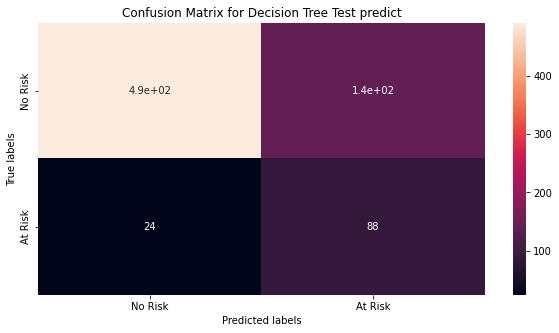

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test,test_dt_prediction)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Predicted values.

y_pred_dt = dt_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       634
           1       0.38      0.79      0.51       112

    accuracy                           0.78       746
   macro avg       0.67      0.78      0.68       746
weighted avg       0.87      0.78      0.80       746



In [ ]:
# Getting classification report.

dict_2 = classification_report(y_test, y_pred_dt, output_dict = True)

In [ ]:
# Storing the scores in a dataframe
tempodf=pd.DataFrame(dict_2).transpose()
tempodf['Model'] = 'Decision Tree Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.776139,0.776139,0.776139,0.776139,Decision Tree Classifier


##### Which hyperparameter optimization technique have you used and why?

We have use GridSearchCV. Grid search is a technique for tuning hyperparameter that may facilitate build a model and evaluate a model for every combination of algorithms parameters per grid. We might use 10 fold cross-validation to search the best value for that tuning hyperparameter.

### ML Model - 3 (**Random Forest Classifier**)

In [ ]:
# Importing Necessary library

from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Creating an instance for the random forest regressor.

rf_clf = RandomForestClassifier()

In [ ]:
# Storing the hyperparameters in Dict
params = {'n_estimators' : [750, 850],
         'max_depth': [7,9],
         'max_features' : [7,8],
         'min_samples_leaf' : [2,3]}

In [ ]:
# Using GridSearchCV for hyperparameter tuning
cv = GridSearchCV(rf_clf, param_grid = params, scoring = 'roc_auc', cv =5)

In [ ]:
# Fitting the model
cv.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 9], 'max_features': [7, 8],
                         'min_samples_leaf': [2, 3],
                         'n_estimators': [750, 850]},
             scoring='roc_auc')

In [ ]:
# Checking the best parameters
cv.best_estimator_

RandomForestClassifier(max_depth=9, max_features=8, min_samples_leaf=2,
                       n_estimators=750)

In [ ]:
# Getting the predicted classes for training and testing set

train_rf_prediction = cv.predict(X_train_sm)
test_rf_prediction = cv.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#**Random Forest Classifier**

*Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.*

*As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.*

*Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.*

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_rf = accuracy_score(train_rf_prediction, y_train_sm)
test_accuracy_rf = accuracy_score(test_rf_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)


The accuracy on train data is  0.9022897749703909
The accuracy on test data is  0.853887399463807


[[538  96]
 [ 13  99]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

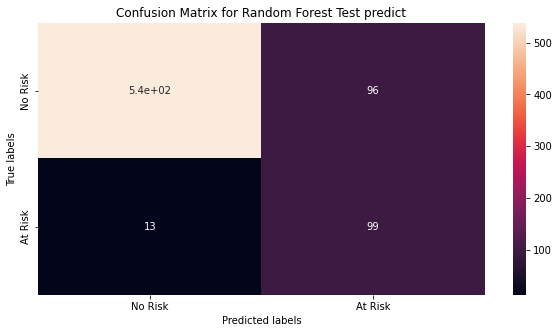

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test,test_rf_prediction)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Predicted values.

y_pred_rf = cv.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       634
           1       0.51      0.88      0.64       112

    accuracy                           0.85       746
   macro avg       0.74      0.87      0.78       746
weighted avg       0.91      0.85      0.87       746



In [ ]:
# Getting classification report.

dict_3 = classification_report(y_test, y_pred_rf, output_dict = True)

In [ ]:
# Storing the scores in a dataframe
tempodf=pd.DataFrame(dict_3).transpose()
tempodf['Model'] = 'Random Forest Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.776139,0.776139,0.776139,0.776139,Decision Tree Classifier
accuracy,0.853887,0.853887,0.853887,0.853887,Random Forest Classifier


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV with Random Forest. We use GridSearchCV to find the best parameters that will make your oob_score very high. Some parameters to tune are: n_estimators: Number of tree your random forest should have.

### ML Model - 4 (**K-Nearest Neighbours Classifier**)

In [ ]:
# ML Model - 4 (Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Importing necessary library

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Creating an instance for the KNN classifier.

KNN_clf = KNeighborsClassifier()

In [ ]:
# Using hyperparameter tuning to get the opimal value of n_neighbors

parameters = {'n_neighbors':np.arange(1,10)}
cv_knn = GridSearchCV(KNN_clf, cv = 5, param_grid = parameters)

In [ ]:
# Fitting the model

cv_knn.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
# Checking the best parameter.

cv_knn.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Getting the predicted classes for training and testing set

train_knn_prediction = cv_knn.predict(X_train_sm)
test_knn_prediction = cv_knn.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#**K-Nearest Neighbours Classifier**

KNN which stands for K-Nearest Neighbours is a simple algorithm that is used for classification and regression problems in Machine Learning. KNN is also non-parametric which means the algorithm does not rely on strong assumptions instead tries to learn any functional form from the training data.

Unlike most of the algorithms with complex names, which are often confusing as to what they really mean, KNN is pretty straight forward. The algorithm considers the k nearest neighbours to predict the class or value of a data point.

*The kNN working can be explained on the basis of the below algorithm:*

* <b>Step-1:</b> Select the number K of the neighbors
* <b>Step-2:</b> Calculate the Euclidean distance of K number of neighbors
* <b>Step-3:</b> Take the K nearest neighbors as per the calculated Euclidean distance.
* <b>Step-4:</b> Among these k neighbors, count the number of the data points in each category.
* <b>Step-5:</b> Assign the new data points to that category for which the number of the neighbor is maximum.
* <b>Step-6:</b> Our model is ready.

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_knn = accuracy_score(train_knn_prediction, y_train_sm)
test_accuracy_knn = accuracy_score(test_knn_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_knn)
print("The accuracy on test data is ", test_accuracy_knn)

The accuracy on train data is  0.9928938018160284
The accuracy on test data is  0.9986595174262735


[[634   0]
 [  1 111]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

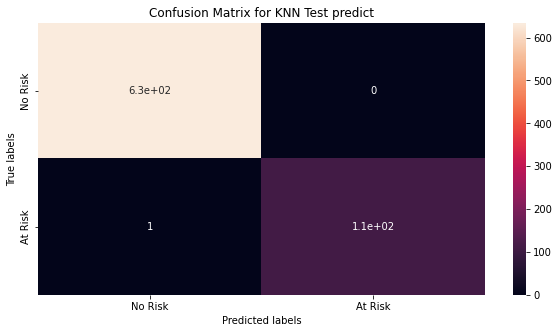

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test,test_knn_prediction)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for KNN Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Predicted values.

y_pred_KNN = cv_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       634
           1       1.00      0.99      1.00       112

    accuracy                           1.00       746
   macro avg       1.00      1.00      1.00       746
weighted avg       1.00      1.00      1.00       746



In [ ]:
# Getting classification report.

dict_4 = classification_report(y_test, y_pred_KNN, output_dict = True)

In [ ]:
# Storing the scores in a dataframe
tempodf=pd.DataFrame(dict_4).transpose()
tempodf['Model'] = 'K-Nearest Neighbours Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.776139,0.776139,0.776139,0.776139,Decision Tree Classifier
accuracy,0.853887,0.853887,0.853887,0.853887,Random Forest Classifier
accuracy,0.998660,0.998660,0.998660,0.998660,K-Nearest Neighbours Classifier


##### Which hyperparameter optimization technique have you used and why?

We use GridSearchCV to find the K value.

### ML Model - 5 (**Gaussian Naive Bayes**)

In [ ]:
# Necessary library

from sklearn.naive_bayes import GaussianNB

In [ ]:
# Creating model object for Naive Bayes Classifier

gnb = GaussianNB()

In [ ]:
# Fitting the model

gnb.fit(X_train_sm, y_train_sm)

GaussianNB()

In [ ]:
# Getting the predicted classes for training and testing set

train_class_preds_gnb = gnb.predict(X_train_sm)
test_class_preds_gnb = gnb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#**Gaussian Naive Bayes:**

The Naïve Bayes algorithm is a classification technique based on the Bayes’ Theorem which assumes there is independence between the features. We interfere with applications utilizing this algorithm on a daily basis, for example it powers recommendation systems for streaming applications or adds on social media as well as many online retail websites.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods. Let’s have a look under the hood of this major classifier.

The simple form of the calculation for Bayes Theorem is as follows:

# **P(A|B) = P(B|A) * P(A) / P(B)**

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_gnb = accuracy_score(train_class_preds_gnb, y_train_sm)
test_accuracy_gnb = accuracy_score(test_class_preds_gnb, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_gnb)
print("The accuracy on test data is ", test_accuracy_gnb)

The accuracy on train data is  0.6091590998815634
The accuracy on test data is  0.7975871313672922


[[554  80]
 [ 71  41]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

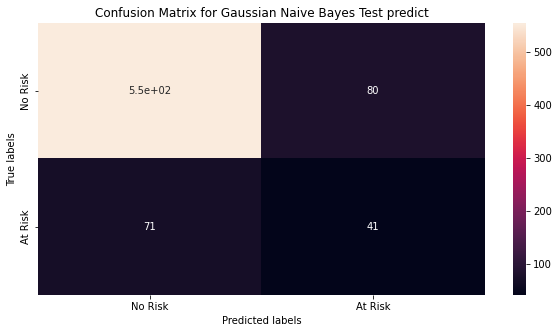

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test,test_class_preds_gnb)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gaussian Naive Bayes Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Predicted values.

y_pred_gnb = gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       634
           1       0.34      0.37      0.35       112

    accuracy                           0.80       746
   macro avg       0.61      0.62      0.62       746
weighted avg       0.80      0.80      0.80       746



In [ ]:
# Getting classification report.

dict_5 = classification_report(y_test, y_pred_gnb, output_dict = True)

In [ ]:
# Storing the scores in a dataframe
tempodf=pd.DataFrame(dict_5).transpose()
tempodf['Model'] = 'Gaussian Naive Bayes Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.776139,0.776139,0.776139,0.776139,Decision Tree Classifier
accuracy,0.853887,0.853887,0.853887,0.853887,Random Forest Classifier
accuracy,0.998660,0.998660,0.998660,0.998660,K-Nearest Neighbours Classifier
accuracy,0.797587,0.797587,0.797587,0.797587,Gaussian Naive Bayes Classifier


### ML Model - 6 (**Extreme Gradient Boost Classifier**)

In [ ]:
#using XGBoost
# Importing XGBoost Classifier.
from xgboost import XGBClassifier, plot_importance

In [ ]:
xg_cla = XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [ ]:
xg_cla.fit(X_train_sm, y_train_sm)

XGBClassifier(alpha=10, colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
              n_estimators=10)

In [ ]:
train_xg_prediction = xg_cla.predict(X_train_sm)
test_xg_prediction = xg_cla.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#**Extreme Gradient Boost Classifier**

*XGBoost is an ensemble learning method. XGBoost is a tree based ensemble machine learning algorithm which is a scalable machine learning system for tree boosting. XGBoost stands for Extreme Gradient Boosting. It uses more accurate approximations to find the best tree model.*

*XGBoost is a tree based ensemble machine learning algorithm which has higher predicting power and performance and it is achieved by improvisation on Gradient Boosting framework by introducing some accurate approximation algorithms. XGB commonly used and frequently makes its way to the top of the leaderboard of competitions in data science. XGBoost – Greatly Boosted.*

In [ ]:

# Getting the accuracy scores for training and testing set.

train_accuracy_xg = accuracy_score(train_xg_prediction, y_train_sm)
test_accuracy_xg = accuracy_score(test_xg_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_xg)
print("The accuracy on test data is ", test_accuracy_xg)

The accuracy on train data is  0.9007106198183972
The accuracy on test data is  0.8565683646112601


[[549  85]
 [ 22  90]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

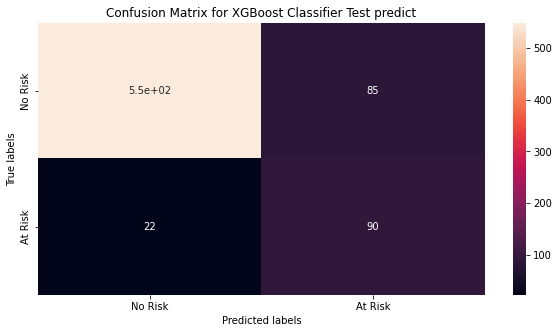

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test,test_xg_prediction)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Classifier Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Predicted values.

y_pred_xg = xg_cla.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       634
           1       0.51      0.80      0.63       112

    accuracy                           0.86       746
   macro avg       0.74      0.83      0.77       746
weighted avg       0.89      0.86      0.87       746



In [ ]:
# Getting classification report.

dict_6 = classification_report(y_test, y_pred_xg, output_dict = True)

In [ ]:
#Storing the scores in a dataframe.
tempodf=pd.DataFrame(dict_6).transpose()
tempodf['Model'] = 'XGBoost Classifier'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.776139,0.776139,0.776139,0.776139,Decision Tree Classifier
accuracy,0.853887,0.853887,0.853887,0.853887,Random Forest Classifier
accuracy,0.998660,0.998660,0.998660,0.998660,K-Nearest Neighbours Classifier
accuracy,0.797587,0.797587,0.797587,0.797587,Gaussian Naive Bayes Classifier
accuracy,0.856568,0.856568,0.856568,0.856568,XGBoost Classifier


# **Hyperparameter Optimization**

In [ ]:
# Creating the hyperparameters in lists.
n_estimators = [50,80,100]
max_depth = [4,6,8]
min_samples_split = [50,100,150]
min_samples_leaf = [40,50]

# storing the hyperparameters in Dict

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the XGBoost

xgb_model = XGBClassifier(learning_rate=0.1)

In [ ]:
# Using GridSearchCV for hyperparameter tuning
xgb_random = GridSearchCV(xgb_model, param_grid = param_dict, scoring = 'roc_auc',cv=5)

In [ ]:
#Fitting the model
xgb_random.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [ ]:
# Checking the best parameter.

xgb_random.best_estimator_

XGBClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [ ]:
# Getting the predicted classes for training and testing set

train_xgb_prediction = xgb_random.predict(X_train_sm)
test_xgb_prediction = xgb_random.predict(X_test)

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_xgb = accuracy_score(train_xgb_prediction, y_train_sm)
test_accuracy_xgb = accuracy_score(test_xgb_prediction, y_test)

# Display accuracies.

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9832214765100671
The accuracy on test data is  0.9745308310991957


[[631   3]
 [ 16  96]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

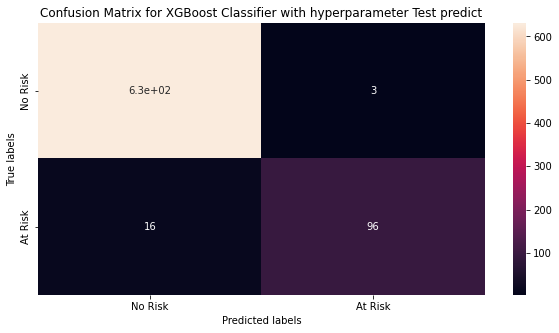

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test,test_xgb_prediction)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Classifier with hyperparameter Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Predicted values.

y_pred_xgb = xgb_random.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       634
           1       0.97      0.86      0.91       112

    accuracy                           0.97       746
   macro avg       0.97      0.93      0.95       746
weighted avg       0.97      0.97      0.97       746



In [ ]:
# Getting classification report.

dict_7 = classification_report(y_test, y_pred_xgb, output_dict = True)

In [ ]:
#Storing the scores in a dataframe.
tempodf=pd.DataFrame(dict_7).transpose()
tempodf['Model'] = 'XGBoost Classifier with hyperparameter'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.776139,0.776139,0.776139,0.776139,Decision Tree Classifier
accuracy,0.853887,0.853887,0.853887,0.853887,Random Forest Classifier
accuracy,0.998660,0.998660,0.998660,0.998660,K-Nearest Neighbours Classifier
accuracy,0.797587,0.797587,0.797587,0.797587,Gaussian Naive Bayes Classifier
accuracy,0.856568,0.856568,0.856568,0.856568,XGBoost Classifier
accuracy,0.974531,0.974531,0.974531,0.974531,XGBoost Classifier with hyperparameter


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is use as a hyperparameter optimization to get the best parameter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes Improvement has been seen from 85% from without hypertune model to 97% hyperparameter optimized model in accuracy and recall value.

### ML Model - 7 (**Support Vector Machine**)

In [ ]:
# Importing Support vector machine Classifier.

from sklearn import svm

In [ ]:
# Create a svm Classifier

svmc = svm.SVC(kernel='poly')

In [ ]:
# Fitting the model with training set

svmc.fit(X_train_sm, y_train_sm)

SVC(kernel='poly')

In [ ]:
# Getting the predicted classes for training and testing set

train_svm_prediction = svmc.predict(X_train_sm)
test_svm_prediction = svmc.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#**Support Vector Machine**

SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems.

**Support Vectors:** These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.

**Margin:** it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin.

In [ ]:
# Getting the accuracy scores for training and testing set.

train_accuracy_svm = accuracy_score(train_svm_prediction, y_train_sm)
test_accuracy_svm = accuracy_score(test_svm_prediction, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", test_accuracy_svm)

The accuracy on train data is  0.7410185550730359
The accuracy on test data is  0.710455764075067


[[445 189]
 [ 27  85]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

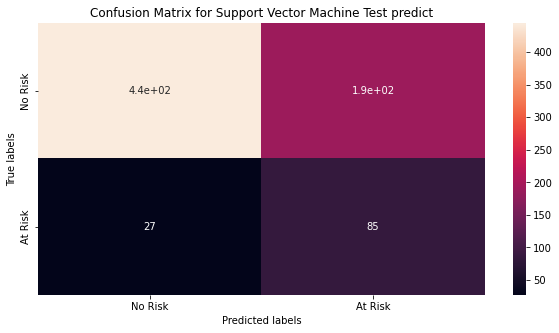

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test,test_svm_prediction)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Support Vector Machine Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Predicted values.

y_pred_svm = svmc.predict(X_test)

In [ ]:
# Getting classification report.

dict_8 = classification_report(y_test, y_pred_svm, output_dict = True)

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80       634
           1       0.31      0.76      0.44       112

    accuracy                           0.71       746
   macro avg       0.63      0.73      0.62       746
weighted avg       0.85      0.71      0.75       746



In [ ]:
#Storing scores in a dataframe.
tempodf=pd.DataFrame(dict_8).transpose()
tempodf['Model'] = 'Support Vector Machine'
res_df=res_df.append(tempodf[2:-2])
res_df

,precision,recall,f1-score,support,Model
accuracy,0.662198,0.662198,0.662198,0.662198,Logistic Regression Classifier
accuracy,0.776139,0.776139,0.776139,0.776139,Decision Tree Classifier
accuracy,0.853887,0.853887,0.853887,0.853887,Random Forest Classifier
accuracy,0.998660,0.998660,0.998660,0.998660,K-Nearest Neighbours Classifier
accuracy,0.797587,0.797587,0.797587,0.797587,Gaussian Naive Bayes Classifier
accuracy,0.856568,0.856568,0.856568,0.856568,XGBoost Classifier
accuracy,0.974531,0.974531,0.974531,0.974531,XGBoost Classifier with hyperparameter
accuracy,0.710456,0.710456,0.710456,0.710456,Support Vector Machine


## **Comparing Models**

In [ ]:
# Necessary library
from prettytable import PrettyTable

In [ ]:
# Plotting the table to compare the accuracy scores of all the models.

print('**** Comparison of  Models ****')
table = PrettyTable(['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1_score'])
table.add_row(['Logistic regression', 0.6621,	0.6621,	0.6621,	0.6621])
table.add_row(['Decision Tree Classifier', 0.7613,	0.7613,	0.7613,	0.7613])
table.add_row(['Random Forest Classifier', 0.8512,	0.8512,	0.8512,	0.8512])
table.add_row(['K-Nearest Neighbours',0.9986,	0.9986,	0.9986,	0.9986])
table.add_row(['Gaussian Naive Bayes', 0.7975,	0.7975,	0.7975,	0.7975])
table.add_row(['XGBoost Classifier', 0.8565,	0.8565,	0.8565,	0.8565])
table.add_row(['XGBoost Classifier with hyperparameter', 0.9745,	0.9745,	0.9745, 0.9745])
table.add_row(['Support Vector Machine', 0.7104,	0.7104,	0.7104,	0.7104])

print(table)

**** Comparison of  Models ****
+----------------------------------------+---------------+-----------+--------+----------+
|                 Model                  | Test Accuracy | Precision | Recall | F1_score |
+----------------------------------------+---------------+-----------+--------+----------+
|          Logistic regression           |     0.6621    |   0.6621  | 0.6621 |  0.6621  |
|        Decision Tree Classifier        |     0.7613    |   0.7613  | 0.7613 |  0.7613  |
|        Random Forest Classifier        |     0.8512    |   0.8512  | 0.8512 |  0.8512  |
|          K-Nearest Neighbours          |     0.9986    |   0.9986  | 0.9986 |  0.9986  |
|          Gaussian Naive Bayes          |     0.7975    |   0.7975  | 0.7975 |  0.7975  |
|           XGBoost Classifier           |     0.8565    |   0.8565  | 0.8565 |  0.8565  |
| XGBoost Classifier with hyperparameter |     0.9745    |   0.9745  | 0.9745 |  0.9745  |
|         Support Vector Machine         |     0.7104    |

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

XGBoost Classifier with hyperparameter optimization has performed best among all the models with the accuracy of 97% & f1-score of 0.9745. It is by far the second highest score we have achieved.So,It's safe to say that XGBoost Classifier provides an optimal solution to our problem.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

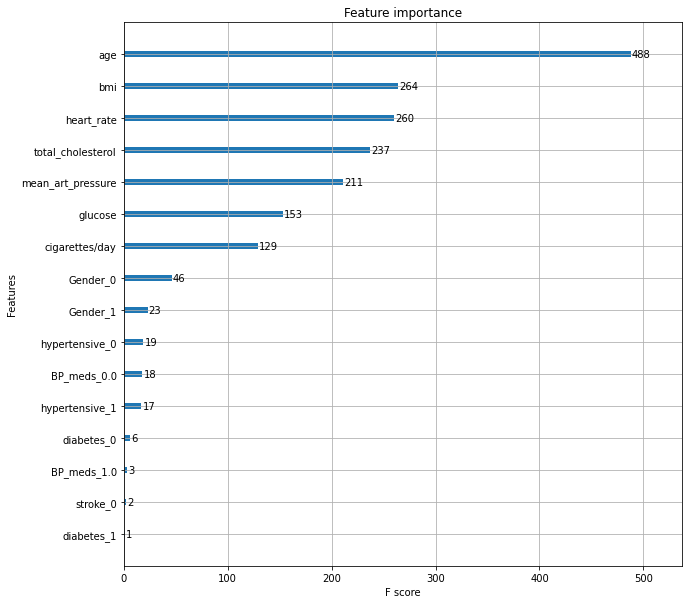

In [ ]:
import xgboost
orig_feature_names = list(dataset.columns)
orig_feature_names.remove('10yearCHD')
xg_cla.get_booster().feature_names = orig_feature_names
ax = xgboost.plot_importance(xg_cla)
ax.figure.set_size_inches(10, 10)
plt.show()
     

From the above plot we can understand the feature importances, almost all the features are influencing the dependent variable. Age is influencing the highest followed by BMI, Heart Rate and Total Cholestrol.

# **optional**

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
filename='file.pkl'
##serialize process
pickle.dump(dataset,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
##unsereliaze
dataset=pickle.load(open(filename,'rb'))

In [ ]:
dataset.head()

,age,cigarettes/day,total_cholesterol,bmi,heart_rate,glucose,10yearCHD,Gender_0,Gender_1,BP_meds_0.0,BP_meds_1.0,stroke_0,stroke_1,hypertensive_0,hypertensive_1,diabetes_0,diabetes_1,mean_art_pressure
1,-1.571612,-0.772226,-0.565109,0.982970,-0.316144,-0.317145,0,0,1,1,0,1,0,0,1,1,0,1.533390
2,-0.406398,0.089400,0.300068,-1.347789,1.038401,0.636545,0,1,0,1,0,1,0,1,0,1,0,-0.930010
3,0.059687,0.951026,-0.086985,0.609356,-0.654780,0.636545,1,0,1,1,0,1,0,0,1,1,0,0.836201
4,1.690986,1.812652,0.095157,0.154091,-0.485462,-0.216756,0,1,0,1,0,1,0,1,0,1,0,0.197112
5,1.341422,-0.772226,0.800959,1.732673,0.784423,-0.819087,1,1,0,1,0,1,0,0,1,1,0,2.927767


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* *In conclusion, All the features provided in the dataset are extremely important and contribute towards the risk of getting CHDs. Although, we can conclude some majorly important features like:*
* *As **age increases** the risk of getting diagnosed with **heart disease also increases**.*
*	***Cigarette consumption*** *is also a* ***major factor*** *that causes CHDs.*
*	*Patients having **Diabetes and cholesterol** problems show a **higher risk of CHDs**.*
*	*Patients having **high glucose levels** are **more prone to CHDs**.*
*	*Patients with a **history of “strokes”** have a **higher** **chance** of developing CHDs.*
*	*Patients with **high BMI(Body Mass Index)** are at **more risk of getting diagnosed with CHDs**.*

* *Finally we can say that, **XGBoost Classifier** has performed best among all the models with the **accuracy**  of **97%** & **f1-score** of **0.9745**. It is by far the second highest score we have achieved.So,It's safe to say that XGBoost Classifier provides an optimal solution to our problem.*

***At the end, Thankyou to you for going through our project till the very end, we appreciate your time.***


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***